# Practical session 3 - Brownian motion, Fourier transform

Students (pair):
- [Student 1]([link](https://github.com/username1))
- [Student 2]([link](https://github.com/username2))

```
conda create --name=lab3 --file=requirement.txt
conda activate lab3
# do not forget to deactivate the environment if needed
# you can remove the environment once you are done
conda env remove --name=lab3
```

In [1]:
%load_ext autoreload
%autoreload 2

### Imports

In [3]:
import matplotlib.pyplot as plt
import numpy as np

## <a name="ex1">Exercise 1: Brownian motion</a>

This first exercise consists in generating a Brownian motion on the closed unit ball $\mathcal{B}(\mathbf{0}, 1) = \{ \mathbf{x} \mid \Vert \mathbf{x} \Vert  \leq 1\}$, focusing first on the 2-D case. The Brownian motion is a random walk with independent, identically distributed Gaussian increments, appearing for instance in thermodynamics and statistical mechanics (to model the evolution of a large particle in a medium composed of a large number of small particles, ...). It is also connected to the diffusion process (Einstein).

Let $N \in \mathbb{N}^*$, $\delta > 0$, and $\mathbf{x} = (x_1, x_2) \in  \mathcal{B}(\mathbf{0}, 1)$. The first $N$ steps of a 2-D discrete-time Brownian motion $W$ can be generated as follows

\begin{align*}
    W_0 &= \mathbf{x}, \\
    %
    (\forall n \in \{1, \dotsc, N-1 \}), \quad W_n &= W_{n−1} + \sqrt{\delta} G_n, \quad G_n \sim \mathcal{N}(\mathbf{0}, \mathbf{I}),
\end{align*}

where $\mathcal{N}(\mathbf{0}, \mathbf{I})$ is a Gaussian distribution with mean $\mathbf{0}$ and identity covariance matrix.

1. Define a random generator `rng`, set to a known state for reproducibility (see session 2).

**Answer:**

In [4]:
rng = np.random.default_rng(42)

2. Implement a function `brownian_motion(niter, x, step, rng)` which

    - simulates $W$ until it reaches the boundary of $\mathcal{B}(\mathbf{0}, 1)$, using a maximum of $N$ iterations (`niter`), a starting point $\mathbf{x} \in \mathcal{B}(\mathbf{0}, 1)$ (`x`) and step-size $\delta$ (`step`);
    - interpolates linearly between the two last positions to determine the points $W^*$ where the trajectory crosses the boundary (if applicable);
    - returns both the whole random walk $W$ and, if appropriate, the point at the intersection between the last segment of the trajectory and $\mathcal{B}(\mathbf{0}, 1)$.
 
> Hint: 
> - you can easily derive a closed form expression for $W^*$, observing that $\Vert W^* \Vert^2= 1$ and $W^* \in [W_{n-1}, W_n]$. 
> - you can also take a look at [`np.roots`](https://numpy.org/doc/stable/reference/generated/numpy.roots.html?highlight=roots#numpy.roots) if needed.

> Recall of the Linear Interpolation (LERP) for $n$-dimensional vectors:
> - Clearly, $\vec{D}=\alpha \vec{C}$ with $\alpha \in [0, 1]$ and hence $\vec{P}-\vec{B}= \alpha (\vec{A}-\vec{B})$ which is equivalent to $\vec{P}= (1-\alpha) \vec{B} + \alpha \vec{A}$. 
![alternatvie text](img/for_Course.png)

**Answer:**

In [6]:
def brownian_motion(
        niter: int,
        x: np.ndarray,
        step: float,
        rng: np.random.Generator
    ) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    Simulates a Brownan motion inside the closed unit ball.

    Parameters
    ----------
    niter : int
        The maximum number of iterations you want to allow.
    x : np.ndarray
        The initial point of the trajectory.
    step : float
        Step for the move.
        Used as: new_point = last_point + np.sqrt(step) * generated move.
    rng : np.ndarray
        2D array (real or complex).

    Returns
    -------
    output: tuple
        Contains:
            1. The list of all the points of the trajectory.
            2. The intersection point between the last move and the ball.
            3. The very last point, outside the ball.
    """

    W = [x]
    for _ in range(1, niter):
        # Gaussian generator of 2 numbers
        g = rng.normal(size=2)
        new_point = W[-1] + np.sqrt(step) * g

        if np.linalg.norm(new_point) <= 1:
            # still inside the unit ball
            W.append(new_point)
        else:
            # we are outside the ball, let's retrieve the last 2 points
            p, q = W[-1], new_point
            d = q - p

            # Solve ||p + t d||^2 = 1, t in (0,1)
            a = np.dot(d, d)
            b = 2 * np.dot(p, d)
            c = np.dot(p, p) - 1

            roots = np.roots([a, b, c])
            t = np.min([r for r in roots if np.isreal(r) and 0 <= r <= 1]).real

            w_star = p + t * d
            w_outside = new_point
            break

    return np.array(W, dtype=np.float64), w_star, w_outside

# Test
rng = np.random.default_rng(42)
x = np.array([0.024, 0.019])
step = 0.05

Wlist, w_star , w_outside = brownian_motion(1000, x, step, rng)
print("Wlist =\n", Wlist)
print('W_outside', w_outside)
print("W* :", w_star)
print("Last point's norm : ", np.linalg.norm(w_outside)) # Should be > 0


Wlist =
 [[ 0.024       0.019     ]
 [ 0.09213681 -0.21354752]
 [ 0.2599428  -0.00323085]
 [-0.17632193 -0.29440704]
 [-0.14773595 -0.36512103]
 [-0.1514928  -0.55586746]
 [ 0.04514656 -0.38194789]
 [ 0.05991148 -0.12988909]
 [ 0.16444974 -0.32203273]
 [ 0.24690493 -0.5364454 ]
 [ 0.44333238 -0.54760917]
 [ 0.4019959  -0.69986965]
 [ 0.67536446 -0.73442349]
 [ 0.57958744 -0.81316294]]
W_outside [ 0.6986154  -0.73144717]
W* : [ 0.61138727 -0.79133154]
Last point's norm :  1.0114733964596807


3. Diplay the trajectory of a Brownian motion starting from $\mathbf{x} = (0.2, 0.4)$, using $\delta = 10^{-2}$, $N = 1000$. Display the unit circle on the same figure, and highlight the intersection with the boundary of the domain (whenever it exists).

> Hint: to draw the unit disk, you can use for instance:
> ```python
> circle = plt.Circle((0,0), 1)
> fig, ax = plt.subplots()
> plt.xlim(-1.25,1.25)
> plt.ylim(-1.25,1.25)
> plt.grid(linestyle = "--", zorder = 1)
> ax.set_aspect(1)
> ax.add_artist(circle)
> ```

**Answer:**

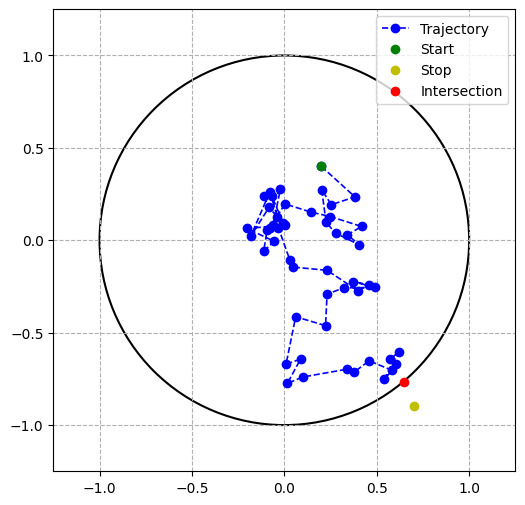

In [12]:
# Parameters
x0 = np.array([0.2, 0.4])   # initial point
step = 1e-2
N = 1000

# Simulation
W, w_star, w_outside = brownian_motion(N, x0, step, rng)

# The Unit Ball
circle = plt.Circle((0, 0), 1, fill=False, color="black", linewidth=1.5)
fig, ax = plt.subplots(figsize=(6, 6))
ax.add_artist(circle)

# Trajectory
ax.plot(W[:, 0], W[:, 1], "--o", color="blue", lw=1.2, zorder=2, label="Trajectory")

# Starting point
ax.plot(W[0, 0], W[0, 1], "go", label="Start")

# Last point
ax.plot(w_outside[0], w_outside[1], "yo", label="Stop")

# Intersection point
if w_star is not None:
    ax.plot(w_star[0], w_star[1], "ro", label="Intersection")

# Display
ax.set_xlim(-1.25, 1.25)
ax.set_ylim(-1.25, 1.25)
ax.set_aspect("equal")
ax.grid(linestyle="--", zorder=1)
ax.legend()
plt.show()

4. Represent, on the same figure, 4 other trajectories of $W$ with the same parameters.

**Answer:**

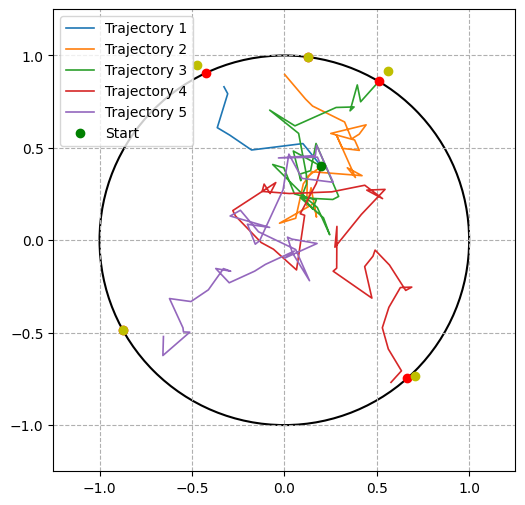

In [14]:

fig, ax = plt.subplots(figsize=(6, 6))

# The Unit Ball
circle = plt.Circle((0, 0), 1, fill=False, color="black", linewidth=1.5)
ax.add_artist(circle)

# The 5 trajectories
for i in range(5):  # 1 + 4 others = 5
    W, w_star, w_outside = brownian_motion(N, x0, step, rng)

    ax.plot(W[:, 0], W[:, 1], lw=1.2, label=f"Trajectory {i+1}")
    if w_star is not None:
        ax.plot(w_star[0], w_star[1], "ro")
    if w_outside is not None:
        ax.plot(w_outside[0], w_outside[1], "yo")

# Display
ax.plot(x0[0], x0[1], "go", label="Start")
ax.set_xlim(-1.25, 1.25)
ax.set_ylim(-1.25, 1.25)
ax.set_aspect("equal")
ax.grid(linestyle="--", zorder=1)
ax.legend()
plt.show()

5. [Bonus] Generalize the procedure to a $M$-dimensional Brownian motion, $M > 2$.

**Answer:**

In [ ]:
# your code

---
## <a name="ex2">Exercise 2: 2D Fourier transform, ideal low-pass filter and linear convolution</a>

In this exercise, we explore the use of the 2-dimensional Fourier transform to filter an image, and convolve it with a blurring kernel.

1\. Load and display one of the images contained in the `img/` folder. The image will be denoted by $\mathbf{X} \in \mathbb{R}^{M_1 \times N_1}$ in the rest of this exercise.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

**Answer:**

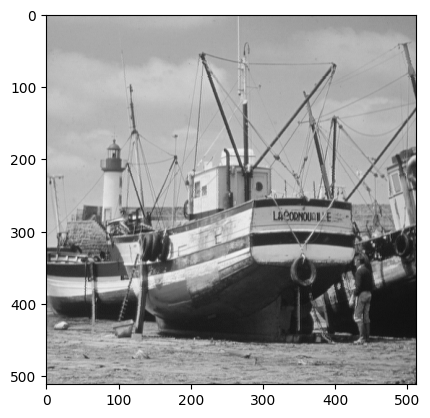

In [3]:
# your code

img = mpimg.imread('img/boat.png') # img is an numpy array
X = img[:,:,0] # img was of shape (512x512) even though it's black and white, so we take the first value (since the first 3 are equal and the alpha is 1)

plt.imshow(X, cmap="gray")

2\. Let $\mathcal{F}$ denote the 2D discrete Fourier transform. Compute $|\mathcal{F}(\mathbf{X})|^2$, the spectrum of the image $\mathbf{X} \in \mathbb{R}^{M_1 \times N_1}$ (i.e., the term-wise squared absolute value of its Fourier transform) loaded in 1. Display the result in logarithmic scale.

a) In this representation, where is the pixel of the spectrum associated with the null frequency located?
    
b) Take a look at the documentation of `np.fft.fftshift`. Use it to ensure that the null frequency is located at the center of the image. 

**Answer:**

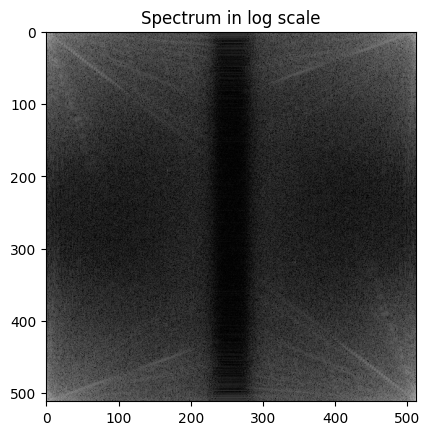

In [4]:
# your code

# 2.
F = np.fft.fft2(X)
spectrum = np.abs(F)**2
log_spectrum = np.log1p(spectrum)  # log scale

plt.imshow(log_spectrum, cmap='gray')
plt.title("Spectrum in log scale")
plt.show()

2. a

Currently, the null frequency is located in the top left corner because np.fft.fft2 places at the same coordinates as the original image and (0,0) is located in the top left corner.

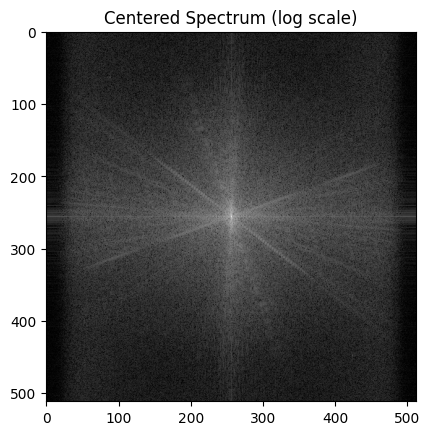

In [5]:
# 2. b

shifted_spectrum = np.fft.fftshift(spectrum)
log_shifted_spectrum = np.log1p(shifted_spectrum)

plt.imshow(log_shifted_spectrum, cmap='gray')
plt.title("Centered Spectrum (log scale)")
plt.show()

3\. 
    a) Create a function `ideal_lowpass_filter` to filter $\mathbf{X}$ by an ideal low-pass filter. The filter preserves Fourier coefficients associated to frequencies below a cutoff specified in each direction ($\mathbf{f}_c = (f_{c,y}, f_{c,x})$), and sets others to zero. For simplicity, $f_{c,y}$ and $f_{c,x}$ can be expressed as a number of samples to be kept along each dimension (e.g., $\mathbf{f}_c = (50,50)$).

b) Display the filtered image for 2 different values of $\mathbf{f}_c$. What do you observe as the cutoff frequencies increase?
    
> Warning: beware the type of the array after `np.fft.fft2`, do not hesitate to specify the type if you make copies from this array
> ```python
> a = np.zeros((2,2), dtype=np.complex)
> ...
> ```

**Answer:**

In [6]:
# your code

# 3. a

def ideal_lowpass_filter(F: np.ndarray, fc: tuple[int, int]) -> np.ndarray:
    """
    Apply an ideal low-pass filter to a 2D Fourier transform F.

    Parameters:
    - F: 2D FFT of the image (complex)
    - fc: tuple (fc_y, fc_x) - number of samples to keep along each axis

    Returns:
    - F_filtered: filtered FFT (complex)
    """
    M, N = F.shape
    fc_y, fc_x = fc

    F_filtered = np.zeros_like(F, dtype=np.complex128) # we ensure the complex type here

    # We compute the center and the bounds of what we keep
    cy, cx = M // 2, N // 2

    y_start = cy - fc_y//2
    y_end = cy + fc_y//2
    x_start = cx - fc_x//2
    x_end = cx + fc_x//2

    F_filtered[y_start:y_end, x_start:x_end] = F[y_start:y_end, x_start:x_end]

    return F_filtered

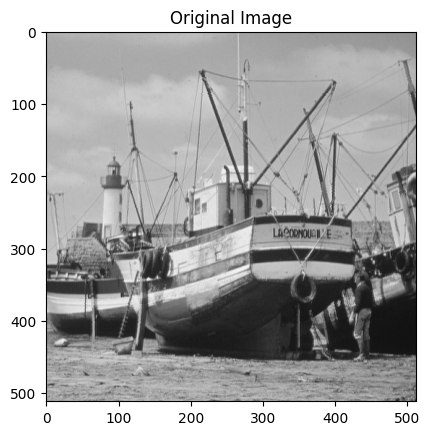

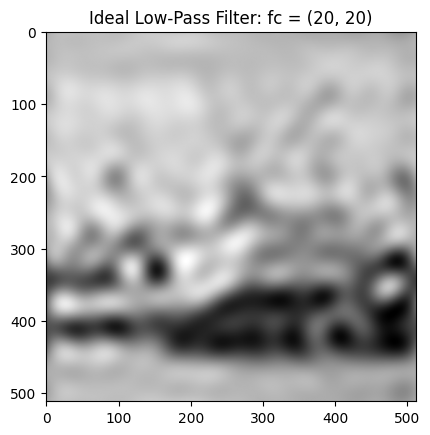

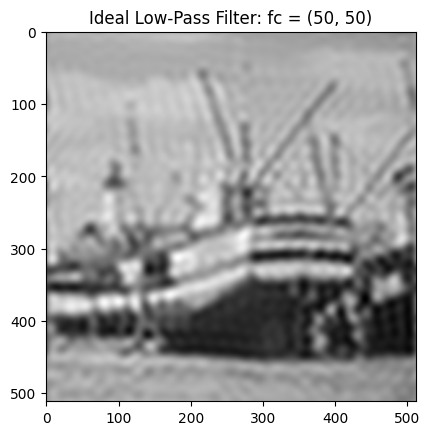

In [7]:
# 3. b

def display_filtered_image(img_2D: np.ndarray, fc: tuple[int, int]):
    F = np.fft.fft2(img_2D)
    F_centered = np.fft.fftshift(F)

    F_lowpass = ideal_lowpass_filter(F_centered, fc)  # example cutoff

    F_lowpass_unshifted = np.fft.ifftshift(F_lowpass)

    img_filtered = np.fft.ifft2(F_lowpass_unshifted).real

    plt.imshow(img_filtered, cmap='gray')
    plt.title(f"Ideal Low-Pass Filter: fc = {fc}")
    plt.show()

cutoffs = [(20,20), (50,50)]

img_name = 'img/boat.png'
img = mpimg.imread(img_name)
X = img[:,:,0]
plt.imshow(X, cmap='gray')
plt.title(f"Original Image")
plt.show()
for fc in cutoffs:
    display_filtered_image(X, fc)

We can observe that the more the fc increases, the sharper the output image is. In contrary, when the fc is smaller, the output image is blurred a lot. It is easily explainable by the fact that fc controls 'how many details' we get, because the highest frequencies are responsible for details, and we will get rid of them if fc is too low.

4\. Let $\mathbf{H} \in \mathbb{R}^{M_2\times N_2}$ be a 2-D Gaussian kernel, obtained as the outer product of two 1-D Gaussian windows $\mathbf{w}_y \in \mathbb{R}^{M_2}$ and $\mathbf{w}_x \in \mathbb{R}^{N_2}$, of standard deviation $\sigma_y = 10$ and $\sigma_x = 10$, respectively:

\begin{equation}
    \mathbf{H} = \mathbf{w}_y \mathbf{w}_x^T.
\end{equation}

Let $M = M_1+M_2-1$ and $N =  N_1+N_2-1$. From the discrete convolution theorem, the linear convolution between $\mathbf{H}$ and $\mathbf{X}$ can be computed as follows

\begin{equation}
    \mathbf{X} \star \mathbf{H} = \mathcal{F}^{-1} \Big( \mathcal{F}\big(P_1(\mathbf{X})\big) \odot \mathcal{F}\big(P_2(\mathbf{H})\big) \Big) \in \mathbb{R}^{M\times N},
\end{equation}

where $P_i: \mathbb{R}^{M_i \times N_i} \rightarrow \mathbb{R}^{M \times N}$, $i \in \{1, 2\}$, are 0-padding operators, $\odot$ is the Hadamard (= term-wise) product, $\mathcal{F}^{-1}$ is the 2D discrete inverse Fourier transform.

Compute and display $\mathbf{X} \star \mathbf{H}$, for $M_2 = N_2 = 10$. What do you observe?

> Hint: 
> - the usual 0-padding procedure in image space consists in appending trailing zeros. For instance (in 1D), 0-padding a vector $\mathbf{x} \in \mathbb{R}^N_1$ to the size $N>N_1$ corresponds to creating the vector
\begin{bmatrix}
\mathbf{x} \\
\mathbf{0}_{N-N_1}
\end{bmatrix}
> - since the input images are real, $\mathcal{F}(\mathbf{x})$ and $\mathcal{F}(\mathbf{h})$ are Hermitian symmetric. In this case, a more efficient version of `np.fft.fft2` can be used, computing only quarter of the Fourier coefficients (half of the Fourier coefficients in each direction): [`np.fft.rfft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft2.html?highlight=rfft#numpy.fft.rfft2). Its inverse, [`np.fft.irfft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.irfft2.html#numpy.fft.irfft2), also ensures that the output is real;
> - the 2D Gaussian window can be generated as the outer product of two 1D Gaussian windows (one window for each dimension);
> - you can take a look at [scipy.signal.windows.gaussian](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.gaussian.html#scipy.signal.windows.gaussian) and [np.newaxis](https://numpy.org/doc/stable/reference/constants.html?highlight=newaxis#numpy.newaxis) (or `np.reshape` or built-in `np.outer`).

**Answer:**

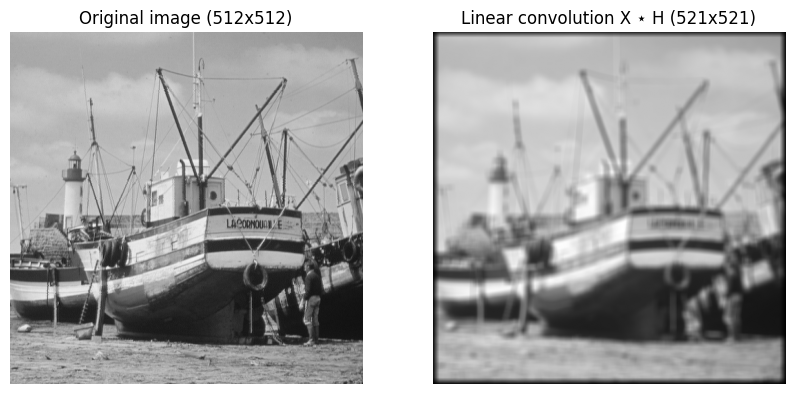

In [8]:
img_gray = mpimg.imread('img/boat.png')[:,:,0]

M1, N1 = img_gray.shape

# Kernel parameters
M2 = 10
N2 = 10
sigma_y = 10.0
sigma_x = 10.0

# Gaussian Kernel
cy = (M2 - 1) / 2.0
cx = (N2 - 1) / 2.0
ys = np.arange(M2)
xs = np.arange(N2)

wy = np.exp(-0.5 * ((ys - cy) / sigma_y) ** 2)
wx = np.exp(-0.5 * ((xs - cx) / sigma_x) ** 2)

# normalize
wy = wy / wy.sum()
wx = wx / wx.sum()

H = np.outer(wy, wx)

# Paddings
M = M1 + M2 - 1
N = N1 + N2 - 1

P1 = np.zeros((M, N), dtype=np.float64)   # padded image
P1[:M1, :N1] = img_gray

P2 = np.zeros((M, N), dtype=np.float64)   # padded kernel (top-left placement)
P2[:M2, :N2] = H

# Convolution
F_X = np.fft.rfft2(P1)
F_H = np.fft.rfft2(P2)

F_prod = F_X * F_H

conv_full = np.fft.irfft2(F_prod, s=(M, N))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original image ({}x{})".format(M1, N1))
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(conv_full, cmap='gray')
plt.title("Linear convolution X ⋆ H ({}x{})".format(M, N))
plt.axis('off')

plt.show()


Once again, this method has a blurring effect. This is because a convolution with a gaussian kernel will kind of make an average at each pixel of its 10x10 neighbors, giving more importance to the center. If we increase the size of the kernel or if we increase the value of the sigma, it will blur it even more because it will give more importance to more neighbors of each pixel.